In [110]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install linearmodels
!pip install datetime
!pip install math

You should consider upgrading via the 'C:\Users\kwnst\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\kwnst\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\kwnst\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\kwnst\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\kwnst\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\kwnst\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
You should consider upgrading via the 'C:\Users\kwnst\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.sandwich_covariance as sw
import datetime as dt
import math
# pip install linearmodels   #uncomment to install, only the first time we run this script or if you get an error
from linearmodels.panel import RandomEffects
from linearmodels.panel import PooledOLS
from linearmodels.panel import PanelOLS
from scipy import optimize

In [112]:
df = pd.read_excel('Thesis_data.xlsx')
df.head(100)
# df.describe()
# a = df["ClimateZone"].unique()
# print(a)

,clientid,WeekDate,consumption,receivedHER,housesize,ClimateZone
0,6,2020-12-07,380122.0,0,185,3
1,6,2020-12-14,355656.0,0,185,3
2,6,2020-12-21,368145.0,0,185,3
3,6,2020-12-28,381596.0,0,185,3
4,6,2021-01-04,464906.0,0,185,3
...,...,...,...,...,...,...
95,7,2021-05-03,233090.0,0,350,3
96,7,2021-05-10,232055.0,0,350,3
97,7,2021-05-17,231651.0,0,350,3
98,7,2021-05-24,199141.0,0,350,3


In [113]:
sem_data = np.std(df.consumption, ddof=1) / np.sqrt(np.size(df.consumption))
print(sem_data)


84083.37907201232


In [88]:
c=0
for i in df.consumption:
    # print(i)
    if np.isnan(i):
        c=c+1
print(c) 

2712


In [114]:
!pip install plotly_express

You should consider upgrading via the 'C:\Users\kwnst\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


C:\Users\kwnst\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kwnst\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


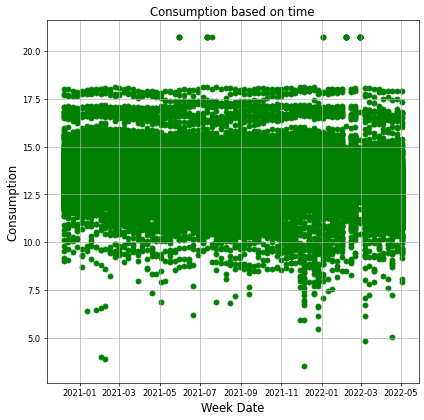

In [90]:
df["consumption"] = np.log(df["consumption"])

# rng = np.random.RandomState(0)
# colors = rng.rand(100)
# sizes = 10000 * rng.rand(100)
# plt.scatter(df.WeekDate, df.consumption, alpha=0.3,cmap='viridis')
# plt.colorbar();
# plt.scatter(df.WeekDate, df.consumption, c ="blue")
 
# # To show the plot
# plt.show()
plt.figure(figsize=(8, 8), dpi=60)
plt.scatter(df['WeekDate'], df['consumption'], color='green')
plt.title('Consumption based on time', fontsize=14)
plt.xlabel('Week Date', fontsize=14)
plt.ylabel('Consumption', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:title={'center':'Climate zones to which constumers belong'}, ylabel='clientid'>

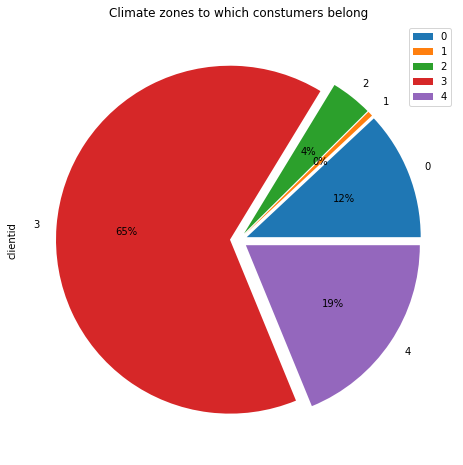

In [91]:
explode = (0.05, 0.05, 0.05,0.05,0.05)
df.groupby(['ClimateZone']).sum().plot(kind='pie', y='clientid', figsize = (8,8) , autopct='%1.0f%%',title='Climate zones to which constumers belong' , explode=explode)

In [94]:
df.describe()

,clientid,consumption,receivedHER,housesize,ClimateZone
count,64158.000000,6.144600e+04,64158.000000,64158.000000,64158.000000
mean,1873.247982,1.421898e+06,0.134636,248.101499,2.845444
std,711.596839,2.129784e+07,0.341337,1659.822608,1.060622
min,6.000000,-1.933014e+08,0.000000,0.000000,0.000000
25%,1412.000000,2.080865e+05,0.000000,0.000000,3.000000
50%,2099.000000,3.734205e+05,0.000000,0.000000,3.000000
75%,2419.000000,6.492350e+05,0.000000,174.000000,3.000000
max,2748.000000,9.999963e+08,1.000000,29000.000000,4.000000


In [115]:

# print(dfex)
# HER = dfex[(dfex["receivedHER"]== 0)].index
# dfex.drop(HER , inplace=True)
# dfex.describe() 
HER = df[(df["receivedHER"]== 0)]
HER.describe()

,clientid,consumption,receivedHER,housesize,ClimateZone
count,55520.000000,5.348100e+04,55520.0,55520.000000,55520.000000
mean,1882.359492,1.554315e+06,0.0,258.836834,2.843768
std,700.680640,2.241158e+07,0.0,1752.638576,1.052580
min,6.000000,-1.933014e+08,0.0,0.000000,0.000000
25%,1423.000000,2.045360e+05,0.0,0.000000,3.000000
50%,2104.000000,3.751580e+05,0.0,0.000000,3.000000
75%,2416.000000,6.921230e+05,0.0,170.000000,3.000000
max,2748.000000,9.999597e+08,0.0,29000.000000,4.000000


In [116]:
# w = df[(df["receivedHER"]== 1)].index
# df.drop(w , inplace=True)
# df.describe()
w = df[(df["receivedHER"]== 1)]
w.describe()


,clientid,consumption,receivedHER,housesize,ClimateZone
count,8638.000000,7.965000e+03,8638.0,8638.000000,8638.000000
mean,1814.684533,5.327822e+05,1.0,179.101065,2.856217
std,775.605670,1.121794e+07,0.0,844.907166,1.110927
min,6.000000,-1.081931e+06,1.0,0.000000,0.000000
25%,1300.000000,2.322910e+05,1.0,0.000000,3.000000
50%,2067.000000,3.653650e+05,1.0,143.000000,3.000000
75%,2447.000000,5.143400e+05,1.0,180.000000,3.000000
max,2748.000000,9.999963e+08,1.0,16114.000000,4.000000


In [117]:
# cond = HER['clientid'].isin(w['clientid'])
# l = HER["cond"]
# HER.drop(HER[cond].index, inplace = True)
k = HER.drop_duplicates().merge(w.drop_duplicates(), on=w.columns.to_list(), 
                   how='left', indicator=True)
q = k.loc[k._merge=='left_only',k.columns!='_merge']

In [118]:
q.describe()

,clientid,consumption,receivedHER,housesize,ClimateZone
count,55520.000000,5.348100e+04,55520.0,55520.000000,55520.000000
mean,1882.359492,1.554315e+06,0.0,258.836834,2.843768
std,700.680640,2.241158e+07,0.0,1752.638576,1.052580
min,6.000000,-1.933014e+08,0.0,0.000000,0.000000
25%,1423.000000,2.045360e+05,0.0,0.000000,3.000000
50%,2104.000000,3.751580e+05,0.0,0.000000,3.000000
75%,2416.000000,6.921230e+05,0.0,170.000000,3.000000
max,2748.000000,9.999597e+08,0.0,29000.000000,4.000000


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# colors = sns.color_palette('pastel')[0:len(df.ClimateZone)]
# plt.pie(df.ClimateZone,df.consumption , colors = colors, autopct='%.0f%%')
# plt.show()

In [127]:
df["WeekDate"] = pd.to_datetime( df["WeekDate"] , format = "%Y-%m-%d")
df["WeekDate"]

clientid  WeekDate  
6         2020-12-07   1970-01-01 00:00:00.000002020
          2020-12-14   1970-01-01 00:00:00.000002020
          2020-12-21   1970-01-01 00:00:00.000002020
          2020-12-28   1970-01-01 00:00:00.000002020
          2021-01-04   1970-01-01 00:00:00.000002021
                                    ...             
2748      2022-04-04   1970-01-01 00:00:00.000002022
          2022-04-11   1970-01-01 00:00:00.000002022
          2022-04-18   1970-01-01 00:00:00.000002022
          2022-04-25   1970-01-01 00:00:00.000002022
          2022-05-02   1970-01-01 00:00:00.000002022
Name: WeekDate, Length: 64158, dtype: datetime64[ns]

In [120]:
# k = df[(df["WeekDate"]== pd.to_datetime("2021-12-06"))]
df1 = df[(df["clientid"]==2447)]
treat = df1[(df1["receivedHER"]== 0)].index
df1.drop(treat , inplace=True)

C:\Users\kwnst\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [121]:
df2 = df[(df["clientid"]==2447)]
# frames = [df1, df2]
control = df2[(df2["receivedHER"]== 1)].index
df2.drop(control , inplace=True)


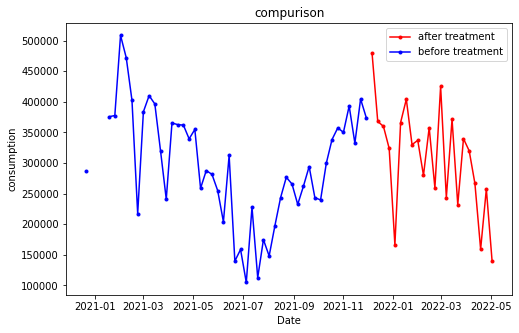

In [122]:
# df1["receivedHER"]= "treatment group"
# df2["receivedHER"]= "control group"
# DF = pd.concat([df1,df2],keys=["treatment group","control group"])
# object01=pd.Series(data=df1.consumption ,name="treatment group")
# object01.plot(legend=True)

# object02=pd.Series(data=df2.consumption , name="control group")
# object02.plot(title="Comparison" , legend=True , xlabel="consumption" , ylabel="value")

# plt.show()
plt.figure(figsize=(8,5))
plt.plot(df1.WeekDate, df1.consumption, "r.-", label = "after treatment")
plt.plot(df2.WeekDate, df2.consumption , "b.-", label = "before treatment")
plt.title("compurison")
plt.ylabel("consumption")
plt.xlabel("Date")
plt.legend()
plt.show()

In [103]:
df.WeekDate.max()

Timestamp('2022-05-02 00:00:00')

In [104]:
df.WeekDate.min()

Timestamp('2020-12-07 00:00:00')

In [105]:
c=0
k=0
for i,j in zip(df.clientid,df.receivedHER):
     if j==1 and i!=k:
        c=c+1
        k=i
print(c)

500


In [123]:
!nstall openpyxl

'nstall' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# import openpyxl
# wb = openpyxl.load_workbook('Thesis_data.xlsx')
# ws = wb["Sheet1"]

1970-01   2020-12-07
1970-01   2020-12-14
1970-01   2020-12-21
1970-01   2020-12-28
1970-01   2021-01-04
             ...    
1970-01   2022-04-04
1970-01   2022-04-11
1970-01   2022-04-18
1970-01   2022-04-25
1970-01   2022-05-02
Name: WeekDate, Length: 64158, dtype: datetime64[ns]

In [11]:
# y = df['consumption']
# x = df['receivedHER']
# x = sm.add_constant(x)
# model = sm.OLS(y, x).fit()
# print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 20 Sep 2022   Prob (F-statistic):                nan
Time:                        10:57:58   Log-Likelihood:                    nan
No. Observations:               64158   AIC:                               nan
Df Residuals:                   64156   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const              nan        nan        nan      

In [124]:
WeekDate = pd.Categorical(df.WeekDate)
df = df.set_index(["clientid", "WeekDate"])
df["WeekDate"] = WeekDate

In [125]:
#Dummies for every year
df["WeekDate"] = pd.DatetimeIndex(df['WeekDate']).year
df["WeekDate"]
new_df = pd.get_dummies(df, columns = ["WeekDate"])
#OLS estimate with dummies
res2020 = PanelOLS(df.consumption, new_df[["receivedHER","WeekDate_2020"]], entity_effects=True).fit()
print(res2020)
res2021 = PanelOLS(df.consumption, new_df[["receivedHER","WeekDate_2021"]], entity_effects=True).fit()
print(res2021)
res2022 = PanelOLS(df.consumption, new_df[["receivedHER","WeekDate_2022"]], entity_effects=True).fit()
print(res2022)

C:\Users\kwnst\AppData\Local\Programs\Python\Python310\lib\site-packages\linearmodels\panel\model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:            consumption   R-squared:                     1.085e-05
Estimator:                   PanelOLS   R-squared (Between):             -0.0024
No. Observations:               61446   R-squared (Within):            1.085e-05
Date:                Tue, Oct 10 2023   R-squared (Overall):             -0.0001
Time:                        19:35:16   Log-likelihood                -1.123e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.3286
Entities:                         867   P-value                           0.7199
Avg Obs:                       70.872   Distribution:                 F(2,60577)
Min Obs:                       8.0000                                           
Max Obs:                       74.000   F-statistic (robust):             0.3286
                            

In [65]:
#Dummies for enery month
# pd.DatetimeIndex(df.WeekDate).to_period("M")
k = df["WeekDate"]
ym_id = k.apply("{:%Y-%m}".format).rename('WeekDate')
df.groupby(ym_id).sum()
new_df2 = pd.get_dummies(df, columns = ['WeekDate'])
new_df2

consumption  receivedHER  housesize  ClimateZone  \
clientid WeekDate                                                       
6        2020-12-07     380122.0            0        185            3   
         2020-12-14     355656.0            0        185            3   
         2020-12-21     368145.0            0        185            3   
         2020-12-28     381596.0            0        185            3   
         2021-01-04     464906.0            0        185            3   
...                          ...          ...        ...          ...   
2748     2022-04-04     707870.0            1        196            0   
         2022-04-11     475432.0            1        196            0   
         2022-04-18     559469.0            1        196            0   
         2022-04-25     747556.0            1        196            0   
         2022-05-02     511434.0            1        196            0   

                     WeekDate_1970-01-01 00:00:00.000002020  \
clientid WeekDate                                             
6        2020-12-07                                       1   
         2020-12-14                                       1   
         2020-12-21                                       1   
         2020-12-28                                       1   
         2021-01-04                                       0   
...                                                     ...   
2748     2022-04-04                                       0   
         2022-04-11                                       0   
         2022-04-18                                       0   
         2022-04-25                                       0   
         2022-05-02                                       0   

                     WeekDate_1970-01-01 00:00:00.000002021  \
clientid WeekDate                                             
6        2020-12-07                                       0   
         2020-12-14                                       0   
         2020-12-21                                       0   
         2020-12-28                                       0   
         2021-01-04                                       1   
...                                                     ...   
2748     2022-04-04                                       0   
         2022-04-11                                       0   
         2022-04-18                                       0   
         2022-04-25                                       0   
         2022-05-02                                       0   

                     WeekDate_1970-01-01 00:00:00.000002022  
clientid WeekDate                                            
6        2020-12-07                                       0  
         2020-12-14                                       0  
         2020-12-21                                       0  
         2020-12-28                                       0  
         2021-01-04                                       0  
...                                                     ...  
2748     2022-04-04                                       1  
         2022-04-11                                       1  
         2022-04-18                                       1  
         2022-04-25                                       1  
         2022-05-02                                       1  

[64158 rows x 7 columns]

In [128]:
#January
res1 = PanelOLS(df.consumption, new_df2[["receivedHER","WeekDate_2021-01-04 00:00:00"]], entity_effects=True).fit()
print(res1)
res2 = PanelOLS(df.consumption, new_df2[["receivedHER","WeekDate_2021-01-11 00:00:00"]], entity_effects=True).fit()
print(res2)
res3 = PanelOLS(df.consumption, new_df2[["receivedHER","WeekDate_2021-01-18 00:00:00"]], entity_effects=True).fit()
print(res3)
res4 = PanelOLS(df.consumption, new_df2[["receivedHER","WeekDate_2021-01-25 00:00:00"]], entity_effects=True).fit()
print(res4)
#February
res5 = PanelOLS(df.consumption, new_df2[["receivedHER","WeekDate_2021-02-01 00:00:00"]], entity_effects=True).fit()
print(res5)
res6 = PanelOLS(df.consumption, new_df2[["receivedHER","WeekDate_2021-02-08 00:00:00"]], entity_effects=True).fit()
print(res6)
res7 = PanelOLS(df.consumption, new_df2[["receivedHER","WeekDate_2021-02-15 00:00:00"]], entity_effects=True).fit()
print(res7)
res8 = PanelOLS(df.consumption, new_df2[["receivedHER","WeekDate_2021-02-22 00:00:00"]], entity_effects=True).fit()
print(res8)

KeyError: "['WeekDate_2021-01-04 00:00:00'] not in index"

In [10]:
#### Pooled OLS
# exog_vars = ["receivedHER", "WeekDate",]       # we include "year" to get the time dummies
# exog = sm.add_constant(df[exog_vars])   #add constant term (intercept)
# mod = PooledOLS(df.consumption, exog)
# pooled_res = mod.fit()
# print(pooled_res)

In [11]:
#### Random Effects
# mod = RandomEffects(df.consumption, exog)
# re_res =  mod.fit(cov_type="clustered")
# print(re_res)

In [129]:
#### Fixed Effects
exog_vars2 = ["receivedHER"]
exog2 = sm.add_constant(df[exog_vars2])
mod = PanelOLS(df.consumption, exog2,  entity_effects=True, time_effects=True )
fe_res = mod.fit(cov_type="clustered")
print(fe_res)



                          PanelOLS Estimation Summary                           
Dep. Variable:            consumption   R-squared:                        0.0002
Estimator:                   PanelOLS   R-squared (Between):              0.0121
No. Observations:               61446   R-squared (Within):              -0.0003
Date:                Tue, Oct 10 2023   R-squared (Overall):              0.0002
Time:                        19:36:16   Log-likelihood                -1.122e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.879
Entities:                         867   P-value                           0.0006
Avg Obs:                       70.872   Distribution:                 F(1,60505)
Min Obs:                       8.0000                                           
Max Obs:                       74.000   F-statistic (robust):             7.0905
                            

In [7]:
# from linearmodels.panel import compare
# print(compare({"FE": fe_res, "RE": re_res, "Pooled": pooled_res}))

In [130]:
df2 = pd.read_excel('normalized.xlsx')
df2

,Unnamed: 0,clientid,WeekDate,consumption,receivedHER,housesize,ClimateZone
0,0,6,2020-12-07,380122,0,185,3
1,1,6,2020-12-14,355656,0,185,3
2,2,6,2020-12-21,368145,0,185,3
3,3,6,2020-12-28,381596,0,185,3
4,4,6,2021-01-04,464906,0,185,3
...,...,...,...,...,...,...,...
64153,64153,2748,2022-04-04,707870,1,196,0
64154,64154,2748,2022-04-11,475432,1,196,0
64155,64155,2748,2022-04-18,559469,1,196,0
64156,64156,2748,2022-04-25,747556,1,196,0


In [131]:
WeekDate = pd.Categorical(df2.WeekDate)
df2 = df2.set_index(["clientid", "WeekDate"])
df2["WeekDate"] = WeekDate

In [133]:
#Fixed effect without nan
exog_vars = ["receivedHER"]
exog = sm.add_constant(df2[exog_vars])
mod = PanelOLS(df2.consumption, exog,  entity_effects=True, time_effects=True )
fe_res = mod.fit(cov_type="clustered")
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:            consumption   R-squared:                        0.0003
Estimator:                   PanelOLS   R-squared (Between):              0.0139
No. Observations:               64158   R-squared (Within):              -0.0005
Date:                Tue, Oct 10 2023   R-squared (Overall):              0.0003
Time:                        19:37:08   Log-likelihood                 -1.17e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      17.837
Entities:                         867   P-value                           0.0000
Avg Obs:                       74.000   Distribution:                 F(1,63217)
Min Obs:                       74.000                                           
Max Obs:                       74.000   F-statistic (robust):             11.094
                            

In [134]:
min_thresold,max_thresold = df2.consumption.quantile([0.05,0.95])
df2_5 = df2[(df2.consumption < max_thresold) & (df2.consumption > min_thresold)]
a = df2_5.shape

min_thresold3,max_thresold3 = df2.consumption.quantile([0.025,0.975])
df3 = df2[(df2.consumption < max_thresold3) & (df2.consumption > min_thresold3)]
b = df3.shape

min_thresold4,max_thresold4 = df2.consumption.quantile([0.01,0.99])
df4 = df2[(df2.consumption < max_thresold4) & (df2.consumption > min_thresold4)]
c = df4.shape

print(a,b,c)

(57742, 6) (60947, 6) (62874, 6)


In [138]:
WeekDate = pd.Categorical(df2_5.WeekDate)
df2_5 = df2_5.set_index(["clientid", "WeekDate"])
df2_5["WeekDate"] = WeekDate

KeyError: "None of ['clientid'] are in the columns"

In [137]:
#Fixed effect - remove outlier 5%
exog_vars2_5 = ["receivedHER"]
exog2_5 = sm.add_constant(df2_5[exog_vars2_5])
mod = PanelOLS(df2_5.consumption, exog2_5,  entity_effects=True, time_effects=True )
fe_res2 = mod.fit(cov_type="clustered")
print(fe_res2)

                          PanelOLS Estimation Summary                           
Dep. Variable:            consumption   R-squared:                        0.0004
Estimator:                   PanelOLS   R-squared (Between):             -0.0024
No. Observations:               57742   R-squared (Within):              -0.0015
Date:                Tue, Oct 10 2023   R-squared (Overall):              0.0023
Time:                        19:38:13   Log-likelihood                -7.871e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      20.379
Entities:                         867   P-value                           0.0000
Avg Obs:                       66.600   Distribution:                 F(1,56816)
Min Obs:                       0.0000                                           
Max Obs:                       74.000   F-statistic (robust):             20.377
                            

In [49]:
WeekDate = pd.Categorical(df3.WeekDate)
df3 = df3.set_index(["clientid", "WeekDate"])
df3["WeekDate"] = WeekDate

In [50]:
#Fixed effect - remove outlier 2.5%
exog_vars3 = ["receivedHER"]
exog3 = sm.add_constant(df3[exog_vars3])
mod = PanelOLS(df3.consumption, exog3,  entity_effects=True, time_effects=True )
fe_res3 = mod.fit(cov_type="clustered")
print(fe_res3)

                          PanelOLS Estimation Summary                           
Dep. Variable:            consumption   R-squared:                      7.45e-05
Estimator:                   PanelOLS   R-squared (Between):             -0.0029
No. Observations:               60947   R-squared (Within):               0.0002
Date:                Sun, Sep 11 2022   R-squared (Overall):             -0.0011
Time:                        00:28:59   Log-likelihood                -8.506e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.4717
Entities:                         856   P-value                           0.0345
Avg Obs:                       71.200   Distribution:                 F(1,60017)
Min Obs:                       2.0000                                           
Max Obs:                       74.000   F-statistic (robust):             3.8398
                            

In [66]:
WeekDate = pd.Categorical(df4.WeekDate)
df4 = df4.set_index(["clientid", "WeekDate"])
df4["WeekDate"] = WeekDate

In [67]:
#Fixed effect remove outlier 0.01%
exog_vars4 = ["receivedHER"]
exog4 = sm.add_constant(df4[exog_vars4])
mod = PanelOLS(df4.consumption, exog4,  entity_effects=True, time_effects=True )
fe_res4 = mod.fit(cov_type="clustered")
print(fe_res4)

                          PanelOLS Estimation Summary                           
Dep. Variable:            consumption   R-squared:                        0.0018
Estimator:                   PanelOLS   R-squared (Between):              0.0017
No. Observations:               62874   R-squared (Within):              -0.0034
Date:                Sun, Sep 11 2022   R-squared (Overall):              0.0034
Time:                        00:40:48   Log-likelihood                -9.386e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      109.48
Entities:                         865   P-value                           0.0000
Avg Obs:                       72.687   Distribution:                 F(1,61935)
Min Obs:                       5.0000                                           
Max Obs:                       74.000   F-statistic (robust):             53.823
                            

In [45]:
new_data=df.query("ClimateZone==4")  #control Alabama
ttt=df.query("ClimateZone==3")      #treatment Arkansas
new_data = new_data.append(ttt) # edo mporo na valo tin entoli tou ttt kai svino to del
del(ttt)
# new_data["receivedHER"] =new_data["WeekDate"]> pd.to_datetime("2020-12-07")
con_before = new_data.query("receivedHER==1 & ClimateZone==4")["consumption"].mean()
con_after = new_data.query("receivedHER==1 & ClimateZone==3")["consumption"].mean()
print('Consumption diff:', con_after - con_before)


control_con_after = new_data.query("receivedHER==0 & ClimateZone==3")["consumption"].mean()
print('consumption diff with control group:',  con_after - control_con_after)

control_con_before = new_data.query("receivedHER==0 & ClimateZone==4")["consumption"].mean()
print('Consumption diff_in_diff:',(con_after - con_before)-(control_con_after-control_con_before))

Consumption diff: -130062.37129756348
consumption diff with control group: -1144982.2596104676
Consumption diff_in_diff: -645408.7840738683


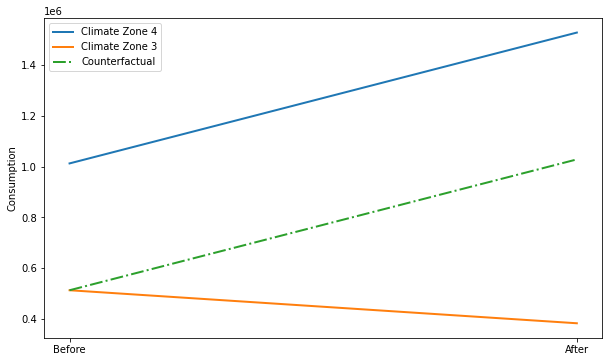

In [47]:
#Diagramm of the differences in climate zone 
plt.figure(figsize=(10,20))
plt.subplot(311)
plt.plot(["Before", "After"], [control_con_before,control_con_after], label="Climate Zone 4", lw=2)
plt.plot(["Before", "After"], [con_before, con_after], label="Climate Zone 3", lw=2)
plt.plot(["Before", "After"], [con_before, con_before+(control_con_after-control_con_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")
plt.ylabel("Consumption")
plt.legend();



In [64]:
import math

# math.log(3029301.9289835165)
k = data3.query("housesize==1000  & receivedHER==0")["consumption"].mean()
math.log(k)

14.787750872939991

In [17]:
new_data2 =pd.read_excel('Thesis_data.xlsx')
new_data2= new_data2.dropna()
year = pd.Categorical(new_data2.WeekDate)
new_data2 = new_data2.set_index(["receivedHER", "WeekDate"])

new_data3 =pd.read_excel('Thesis_data.xlsx')
new_data4 =pd.get_dummies(new_data3.WeekDate)
# print(new_data4)
new_data4.drop(columns= pd.to_datetime("2021-12-06"))     

new_data5 =pd.get_dummies(new_data3.receivedHER)
new_data5.drop(columns=1) 
new_data3=new_data3.join([new_data4, new_data5])
year = pd.Categorical(new_data3.WeekDate)
new_data3 = new_data3.set_index(["receivedHER", "WeekDate"])


exog=new_data3.iloc[:, 10:86:1]
#const=np.ones(len(exog)-1)
#exog = exog.join(const)
mod = PooledOLS(new_data3.consumption, exog, check_rank=False)
pooled_res = mod.fit()
print(pooled_res)



mod=PanelOLS.from_formula('consumption ~  receivedHER + EntityEffects + TimeEffects' , data=new_data2)
print(mod.fit(cov_type='robust'))


C:\Users\kwnst\AppData\Local\Programs\Python\Python310\lib\site-packages\linearmodels\panel\model.py:854: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PooledOLS Estimation Summary                          
Dep. Variable:            consumption   R-squared:                        0.0356
Estimator:                  PooledOLS   R-squared (Between):              1.0000
No. Observations:               61446   R-squared (Within):               0.0310
Date:                Tue, Aug 30 2022   R-squared (Overall):              0.0356
Time:                        14:15:18   Log-likelihood                -1.123e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      32.328
Entities:                           2   P-value                           0.0000
Avg Obs:                    3.072e+04   Distribution:                F(70,61376)
Min Obs:                       7965.0                                           
Max Obs:                    5.348e+04   F-statistic (robust):             32.328
                            

FactorEvaluationError: Unable to evaluate factor `receivedHER`. [KeyError: 'receivedHER']

In [72]:
# data=df.query("receivedHER==0") #control group
# tt=df.query(" receivedHER==1")      #treatment group
# new_data = new_data.append(tt) # edo mporo na valo tin entoli tou ttt kai svino to del
# del(tt)
# # data["receivedHER"] = data["WeekDate"] > pd.to_datetime("2020-12-07")
# # data["receivedHER"] =data["receivedHER"].astype(int)


# consumption_before2 = data.query("receivedHER==1")["consumption"].mean()
# print(consumption_before2)
# consumption_after2 = data.query("receivedHER==0")["consumption"].mean()
# print(consumption_after2)
# print('consumption diff:', consumption_after2 - consumption_before2)


In [89]:
df.housesize.max()

29000

In [48]:
data3=df.query("housesize==147") #control group
data3 = df.append(df.query("housesize==1000")) #treatment group
 
# data3["receivedHER"] = data3["WeekDate"] > pd.to_datetime("2020-12-07")
# data3["receivedHER"] =data3["receivedHER"].astype(int)

consumption_before3 = data3.query("housesize==147 & receivedHER==1")["consumption"].mean()
# print(consumption_before3)
consumption_after3 = data3.query("housesize==1000  & receivedHER==1")["consumption"].mean()
# print(consumption_after3)
print('consumption diff:', consumption_after3 - consumption_before3)

consumption diff: 798505.4125


In [49]:
control_consumption_after3 = data3.query("housesize==147 & receivedHER==0")["consumption"].mean()
print('consumption diff with control group:', consumption_after3 - control_consumption_after3 )

control_consumption_before3 = data3.query("housesize==1000 & receivedHER==0")["consumption"].mean()
print('consumption diff_in_diff:',(consumption_after3 - consumption_before3)-(control_consumption_after3 - control_consumption_before3))

consumption diff with control group: 784600.7932692308
consumption diff_in_diff: 3029301.9289835165


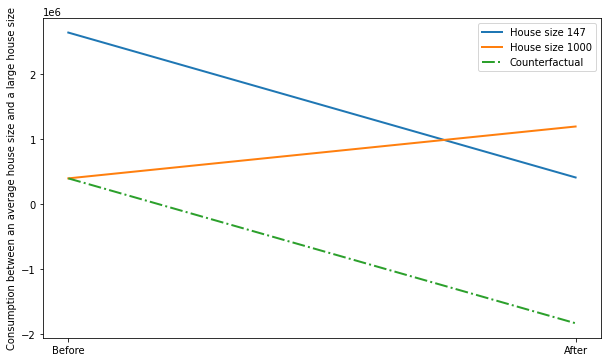

In [60]:
plt.figure(figsize=(10,20))
plt.subplot(311)
plt.plot(["Before", "After"], [control_consumption_before3, control_consumption_after3], label="House size 147", lw=2)
plt.plot(["Before", "After"], [consumption_before3, consumption_after3], label="House size 1000", lw=2)
plt.plot(["Before", "After"], [consumption_before3, consumption_before3+(control_consumption_after3-control_consumption_before3)],
         label="Counterfactual", lw=2, color="C2", ls="-.")
plt.ylabel("Consumption between an average house size and a large house size")
plt.legend();

In [9]:
# new_data["state_dummy"] =new_data["housesize"]== 147
# new_data["state_dummy"] =new_data["state_dummy"].astype(int)

# smf.ols('consumption ~ state_dummy*receivedHER', data=new_data).fit().summary()